# Analysis on Work-related Happy Moments

In [502]:
import re
import contractions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from nltk.corpus import wordnet
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramCollocationFinder

In [503]:

def replace_words(text):
    for word, replacement in corrections.items():
        text = text.replace(word, replacement)
    return text

#Frequency functions
def entertainment_frequency(text):
    lowered_text = text.lower()
    matches = entertainment_pattern.findall(lowered_text)
    return len(matches)
def exercise_frequency(text):
    lowered_text = text.lower()
    matches = exercise_pattern.findall(lowered_text)
    return len(matches)
def family_frequency(text):
    lowered_text = text.lower()
    matches = family_pattern.findall(lowered_text)
    return len(matches)
def food_frequency(text):
    lowered_text = text.lower()
    matches = food_pattern.findall(lowered_text)
    return len(matches)
def people_frequency(text):
    lowered_text = text.lower()
    matches = people_pattern.findall(lowered_text)
    return len(matches)
def work_frequency(text):
    lowered_text = text.lower()
    matches = work_pattern.findall(lowered_text)
    return len(matches)
def school_frequency(text):
    lowered_text = text.lower()
    matches = school_pattern.findall(lowered_text)
    return len(matches)
def shopping_frequency(text):
    lowered_text = text.lower()
    matches = shopping_pattern.findall(lowered_text)
    return len(matches)
def pets_frequency(text):
    lowered_text = text.lower()
    matches = pets_pattern.findall(lowered_text)
    return len(matches)

def sentence_preprocessing(sentence):
    #Replace "`" with "'"
    sentence = sentence.replace("`","'")
    #Replace contractions
    sentence = contractions.fix(sentence)
    sentence = re.sub(r"\w+\.com",'', sentence)
    #Remove URLs
    sentence = re.sub(r"http\S+", "", sentence)
    #Remove numbers
    sentence = "".join([i for i in sentence if not i.isdigit()])
    #Remove punctuations except "$", "-", and "'"
    sentence = "".join([i for i in sentence if i not in string.punctuation or i=="$" or i == "-" or i=="'" or i=="_"])
    #Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    #Remove stop words
    tokens = [token.lower() for token in tokens if token.lower() not in updated_stopwords or token.lower()=="won"]
    return tokens
def text_correction(word):
    corrections = {
    "unde's": 'uncle',
    "uncle's": 'uncle',
    "b'day": 'birthday',
    "mother's": 'mother',
    "year's": "year",
    "bus,": "bus",
    'february,': 'february',
    "children's": 'children',
    "daughter's": 'daughter',
    "did't": "did not",
    'ndonating': 'donate',
    "god's": 'god',
    "sister's": 'sister',
    "sisters's": 'sister',
    "parent's": 'parent',
    "brother's": 'brother',
    'thrones0': 'thrones',
        "n't": 'not'
}
    if word in corrections:
        return corrections[word]
    else:
        return word
    
def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_tags = ["n", "v", "a", "r", "s", "p", "i", "c", "u", "x"]
    for pos_tag in pos_tags:
        pos_counts[pos_tag] = len([item for item in probable_part_of_speech if item.pos() == pos_tag])
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def rightTypes(ngram):
    for word in ngram:
        if word in stopwords.words('english') or word.isspace():
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False
def bigram_noun(bigram):
    first_tag = get_part_of_speech(bigram[0])
    second_tag = get_part_of_speech(bigram[1])
    if first_tag not in ['a','n'] and second_tag != 'n':
        return False
    return True
def replace_bigram(hm_text):
    for bigram in bigrams:
        hm_text = hm_text.replace(bigram, '_'.join(bigram.split()))
    return hm_text

def noun_verb(x):
    tag = nltk.pos_tag(x)
    filtered_tokens = [word[0] for word in tag if word[1].startswith("N")]
    return filtered_tokens

In [504]:
hm = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\cleaned_hm.csv", encoding = "utf-8")
demographic = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\demographic.csv", encoding = "utf-8")
vad = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\vad.csv", encoding="utf-8")
sense_label = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\senselabel.csv", encoding="utf-8")

#Create a topic dictionary
entertainment = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\entertainment-dict.csv", encoding="utf-8", header = None)
exercise = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\exercise-dict.csv", encoding="utf-8", header = None)
family = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\family-dict.csv", encoding="utf-8", header = None)
food = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\food-dict.csv", encoding="utf-8", header = None)
people = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\people-dict.csv", encoding="utf-8", header = None)
school = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\school-dict.csv", encoding="utf-8", header = None)
work = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\work-dict.csv", encoding="utf-8", header = None)
shopping = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\shopping-dict.csv", encoding="utf-8", header = None)
pets = pd.read_csv(r"C:\Users\wangj\Desktop\HappyDB\pets-dict.csv", encoding="utf-8", header = None)

topic_dictionary = dict()
topic_dictionary["entertainment"] = entertainment[0].tolist()
topic_dictionary["exercise"] = exercise[0].tolist()
topic_dictionary["family"] = family[0].tolist()
topic_dictionary["food"] = food[0].tolist()
topic_dictionary["people"] = people[0].tolist()
topic_dictionary["school"] = school[0].tolist()
topic_dictionary["work"] = work[0].tolist()
topic_dictionary["shopping"] = shopping[0].tolist()
topic_dictionary["pets"] = pets[0].tolist()

In [505]:
hm[["hmid","wid"]] = hm[["hmid","wid"]].astype(str)
vad["hmid"] = vad["hmid"].astype(str)
demographic["wid"] = demographic["wid"].astype(str)
sense_label["hmid"] = sense_label["hmid"].astype(str)

### Data Preprocessing

In [506]:
custom_stopwords = []
updated_stopwords = set(stopwords.words("english")).union(custom_stopwords)

In [507]:
lemma_df = pd.DataFrame()
lemma_df["hmid"] = hm["hmid"]
lemma_df["wid"] = hm["wid"]
lemma_df["reflection_period"] = hm["reflection_period"]
lemma_df["cleaned_hm"] = hm["cleaned_hm"]
lemma_df["original_tokens"] = lemma_df["cleaned_hm"].apply(sentence_preprocessing)
lemma_df = lemma_df.explode('original_tokens', ignore_index=True)

In [508]:
lemma_df = lemma_df.dropna()
lemma_df["original_tokens"] = lemma_df["original_tokens"].replace("$","money")
lemma_df["tokens"] = lemma_df["original_tokens"].apply(lambda x: re.sub(r"^[-']+$",'', x))
lemma_df["tokens"] = lemma_df["tokens"].apply(lambda x: re.sub(r"^\W*|\W*$",'', x))
lemma_df = lemma_df[(lemma_df["tokens"]!='')&(~lemma_df["tokens"].str.startswith("'"))].reset_index(drop=True)
lemma_df = lemma_df[(lemma_df["tokens"]!='')&(~lemma_df['tokens'].isin(list(string.punctuation)))&(~lemma_df['tokens'].isin(list(updated_stopwords)))]
lemma_df["tokens"] = lemma_df["tokens"].apply(text_correction)
lemma_df = lemma_df[lemma_df['tokens'].str.len() != 2]
lemma_df

,hmid,wid,reflection_period,cleaned_hm,original_tokens,tokens
0,27673,2053,24h,I went on a successful date with someone I fel...,went,went
1,27673,2053,24h,I went on a successful date with someone I fel...,successful,successful
2,27673,2053,24h,I went on a successful date with someone I fel...,date,date
3,27673,2053,24h,I went on a successful date with someone I fel...,someone,someone
4,27673,2053,24h,I went on a successful date with someone I fel...,felt,felt
...,...,...,...,...,...,...
903989,128765,1629,24h,I had a great meeting yesterday at work with m...,team,team
903990,128766,141,24h,I had a great workout last night.,great,great
903991,128766,141,24h,I had a great workout last night.,workout,workout
903992,128766,141,24h,I had a great workout last night.,last,last


In [509]:
lemmatizer = WordNetLemmatizer()
lemma_df["tokens"] = lemma_df["tokens"].apply(lambda x: lemmatizer.lemmatize(x, get_part_of_speech(x)))
lemma_df = lemma_df[~lemma_df['tokens'].isin(list(updated_stopwords))]

In [510]:
#Delete duplicated rows
lemma_df = lemma_df.groupby(["hmid","wid","reflection_period","cleaned_hm"]).agg(list)["tokens"].reset_index()
lemma_df["tokens"] = lemma_df["tokens"].apply(tuple)
lemma_df = lemma_df.drop_duplicates(subset="tokens")
lemma_df["tokens"] = lemma_df["tokens"].apply(list)
lemma_df

,hmid,wid,reflection_period,cleaned_hm,tokens
0,100000,884,3m,I bought cute earrings,"[buy, cute, earring]"
1,100001,560,3m,Last month my children took a tour.,"[last, month, child, take, tour]"
2,100002,395,3m,I finished reading the New Testament fully. I ...,"[finish, read, new, testament, fully, super, h..."
3,100003,10079,3m,"Was awarded employee of the month at work, mad...","[award, employee, month, work, make, feel, app..."
4,100004,2905,3m,I made plans to meet up with a girl I like.,"[make, plan, meet, girl, like]"
...,...,...,...,...,...
100529,99994,334,3m,I went out to eat with my girlfriend and we ta...,"[go, eat, girlfriend, talk, game, play]"
100531,99996,2294,3m,I was happy when I was able to lose several po...,"[happy, able, lose, several, pound, week, diet]"
100532,99997,8044,3m,Helped the elderly neighbor lady get her coole...,"[help, elderly, neighbor, lady, get, cooler, w..."
100533,99998,2473,3m,My macaroni and cheese turned out perfect and ...,"[macaroni, cheese, turn, perfect, best, macaro..."


## Sentimental Analysis

### Sentimental intensity based on gender

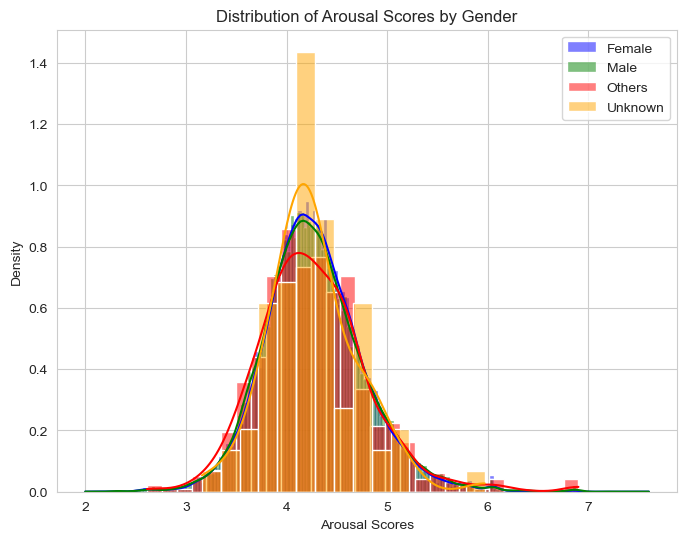

In [618]:
#Gender
demographic_vad = pd.merge(lemma_demographic, vad, on="hmid", how= "inner")
plt.figure(figsize=(8, 6))
sns.histplot(demographic_vad[demographic_vad["gender"]=="f"]["arousal"], kde=True, color="blue", label="Female", stat="density")
sns.histplot(demographic_vad[demographic_vad["gender"]=="m"]["arousal"], kde=True, color="green", label="Male", stat="density")
sns.histplot(demographic_vad[demographic_vad["gender"]=="o"]["arousal"], kde=True, color="red", label="Others", stat="density")
sns.histplot(demographic_vad[demographic_vad["gender"].isna()]["arousal"], kde=True, color="orange", label="Unknown", stat="density")
plt.xlabel("Arousal Scores")
plt.ylabel("Density")
plt.title("Distribution of Arousal Scores by Gender")
plt.legend()
plt.show()

We consider the arousal score as an approximation of sentiment intensity. On average, individuals with an unknown gender tend to have the highest arousal scores. Females and males exhibit very similar arousal scores, while individuals in other gender categories tend to have lower arousal scores on average.

### LDA Modeling

In [511]:
#PMI
bigram_finder = BigramCollocationFinder.from_documents(lemma_df["tokens"].tolist())
bigram_finder.apply_freq_filter(300)
pmi_scores = bigram_finder.score_ngrams(BigramAssocMeasures.pmi)
bigram_pmi= pd.DataFrame(pmi_scores)
bigram_pmi.columns = ['bigram','pmi']
bigram_pmi.sort_values(by="pmi")
print(bigram_pmi)

#Raw Frequency
bigram_freq = bigram_finder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]
filtered_bi.head(20)

               bigram        pmi
0        (ice, cream)  10.229734
1      (even, though)   9.178284
2       (video, game)   7.319223
3    (family, member)   7.172168
4   (birthday, party)   6.741822
5       (last, night)   6.269185
6         (week, ago)   6.009067
7      (three, month)   5.850477
8        (month, ago)   5.689437
9      (friend, mine)   5.600532
10        (year, old)   5.594157
11      (past, month)   5.579887
12     (watch, movie)   5.478580
13     (best, friend)   5.429124
14     (moment, life)   5.409451
15      (first, time)   5.243584
16       (come, home)   5.185817
17       (long, time)   5.121555
18      (come, visit)   5.111170
19       (last, week)   5.084441
20      (spend, time)   5.072777
21        (two, week)   4.925604
22      (last, month)   4.921924
23       (come, back)   4.865325
24      (event, make)   4.790289
25    (one, favorite)   4.781163
26         (buy, new)   4.743314
27      (mother, day)   4.557713
28    (really, enjoy)   4.322585
29        

,bigram,freq
43,"(last, night)",1966
6,"(first, time)",1728
31,"(long, time)",1254
32,"(happy, moment)",1178
29,"(event, make)",1162
0,"(last, month)",1161
15,"(last, week)",1074
21,"(spend, time)",961
48,"(best, friend)",850
35,"(video, game)",679


In [512]:
filtered_bigram = bigram_pmi[(bigram_pmi['bigram'].apply(lambda x: bigram_noun(x)))&(bigram_pmi['pmi']>4)]
filtered_bigram
bigrams = [' '.join(x) for x in filtered_bigram['bigram'].values]
lemma_df = pd.DataFrame()
lemma_df["hmid"] = hm["hmid"]
lemma_df["wid"] = hm["wid"]
lemma_df["original_tokens"] = hm["cleaned_hm"].apply(replace_bigram)
lemma_df["original_tokens"] = lemma_df["original_tokens"].apply(sentence_preprocessing)
lemma_df = lemma_df.explode('original_tokens', ignore_index=True)
lemma_df = lemma_df.dropna()
lemma_df["original_tokens"] = lemma_df["original_tokens"].replace("$","money")
lemma_df["tokens"] = lemma_df["original_tokens"].apply(lambda x: re.sub(r"^[-']+$",'', x))
lemma_df["tokens"] = lemma_df["tokens"].apply(lambda x: re.sub(r"^\W*|\W*$",'', x))
lemma_df = lemma_df[(lemma_df["tokens"]!='')&(~lemma_df["tokens"].str.startswith("'"))].reset_index(drop=True)
lemma_df = lemma_df[(lemma_df["tokens"]!='')&(~lemma_df['tokens'].isin(list(string.punctuation)))&(~lemma_df['tokens'].isin(list(updated_stopwords)))]
lemma_df["tokens"] = lemma_df["tokens"].apply(text_correction)
lemma_df = lemma_df[lemma_df['tokens'].str.len() != 2]
lemma_df["tokens"] = lemma_df["tokens"].apply(lambda x: lemmatizer.lemmatize(x, get_part_of_speech(x)))
lemma_df = lemma_df[~lemma_df['tokens'].isin(list(updated_stopwords))]
lemma_df = lemma_df.groupby(["hmid","wid"]).agg(list)["tokens"].reset_index()
lemma_df["tokens"] = lemma_df["tokens"].apply(tuple)
lemma_df = lemma_df.drop_duplicates(subset="tokens")
lemma_df["tokens"] = lemma_df["tokens"].apply(list)
lemma_copy = lemma_df.copy()
lemma_copy["tokens"] = lemma_copy["tokens"].apply(lambda x: noun_verb(x))
lemma_demographic = pd.merge(lemma_copy, demographic, on = "wid", how = "left")

In [526]:
from gensim import corpora, models
from gensim.models import LdaModel, CoherenceModel
documents = lemma_demographic["tokens"].tolist()
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]
lda_model = models.LdaModel(corpus, num_topics=37, id2word=dictionary, random_state=42)
for topic_id, topic_terms in lda_model.show_topics(num_words=10,num_topics=-1, formatted=False):
    print(f"Topic {topic_id}: {', '.join([term[0] for term in topic_terms])}")
print("Perplexity Score:", lda_model.log_perplexity(corpus))
coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)

Topic 0: life, moment, amount, study, month, rest, cost, time, tournament, teacher
Topic 1: play, order, game, mail, video_game, ask, online, eye, brand, repair
Topic 2: night, shop, date, catch, change, raise, bit, debt, loan, payment
Topic 3: friend, birthday, celebrate, move, party, time, everyone, travel, church, smile
Topic 4: pay, pass, person, bill, test, group, exam, everything, grade, water
Topic 5: gift, surprise, manage, amaze, bike, birthday, festival, come, player, career
Topic 6: yesterday, weekend, make, thing, concert, face, fall, stock, time, trump
Topic 7: event, watch, girlfriend, card, month, pizza, breakfast, credit, paper, hotel
Topic 8: help, city, pound, egg, amazon, effort, guitar, steak, view, appreciate
Topic 9: husband, vacation, first_time, end, computer, song, find, minute, excite, release
Topic 10: trip, mom, place, enjoy, plan, lot, apartment, run, clothe, treat
Topic 11: movie, food, ticket, boyfriend, meal, watch, eat, childhood, income, gas
Topic 12: 

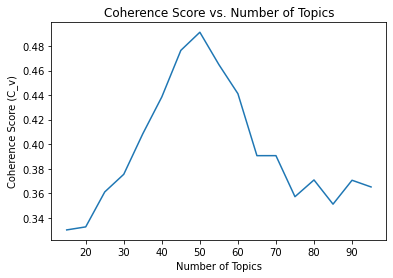

In [112]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

topic_range = range(15, 100, 5)  
coherence_scores = []
for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state = 42)
    coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (C_v)")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

Although coherence score reaches peak at 50 number of topics, when we examine those topics, they are not very interpretable. Thus we chose 37 number of topics.

In [527]:
topic_assignments = []
for doc in documents:
    bow = dictionary.doc2bow(doc)
    topic_distribution = lda_model.get_document_topics(bow)
    topic_assignment = max(topic_distribution, key=lambda x: x[1])
    topic_assignments.append(topic_assignment[0])
lemma_demographic["topics"] = topic_assignments

In [529]:
topic_labels = {
    0: "others",
    1: "others",
    2: "others",
    3: "celebration",
    4: "others",
    5: "gifting",
    6: "others",
    7: "others",
    8: "others",
    9: "others",
    10: "others",
    11: "entertainment and food",
    12: "others",
    13: "others",
    14: "others",
    15: "others",
    16: "school",
    17: "others",
    18: "shopping",
    19: "others",
    20: "others",
    21: "others",
    22: "others",
    23: "others",
    24: "work",
    25: "entertainment and shopping",
    26: "others",
    27: "others",
    28: "others",
    29: "others",
    30: "work",
    31: "health",
    32: "leisure",
    33: "school and food",
    34: "others",
    35: "others",
    36: "others"
}
lemma_demographic["topics"] = lemma_demographic["topics"].map(topic_labels)

,hmid,wid,tokens,age,country,gender,marital,parenthood,topics
0,100000,884,[earring],22.0,USA,f,married,n,others
1,100001,560,"[month, tour]",33,IND,m,married,y,others
2,100002,395,"[jesus, mission, life, way]",33.0,USA,m,single,n,others
3,100003,10079,"[employee, month, work, feel, appreciate]",22,USA,m,single,y,others
4,100004,2905,"[plan, girl]",20.0,USA,m,single,n,others
...,...,...,...,...,...,...,...,...,...
92647,99994,334,"[girlfriend, talk, game, play]",23,USA,f,single,n,others
92648,99996,2294,"[pound, week]",28,USA,f,single,n,others
92649,99997,8044,"[help, neighbor, work, summer, thank, get]",43,UGA,m,divorced,y,others
92650,99998,2473,"[macaroni, turn, macaroni, cheese]",41,USA,m,divorced,n,others


In [530]:
#Assigning topic lables to each happy moment
corrections = {
    'unde`s': 'uncle',
    'uncle`s': 'uncle',
    "b'day": 'birthday',
    'mother`s': 'mother',
    "ma'am": 'mother',
    'can`t': "can't",
    'cant': "can't",
    "year's": "year",
    "bus,": "bus",
    'february,': 'february',
    'children`s': 'children',
    'daughter`s': 'daughter',
    "did't": "did not",
    "didnt": "did not",
    'n\\donating': 'donate',
    'god`s': 'god',
    "april'": 'april',
    'sister`s': 'sister',
    'sisters`s': 'sister',
    'parent`s': 'parent',
    'brother`s': 'brother',
    'thrones0': 'thrones',
    'wont': "won't",
    "n't": 'not'
}

hm["cleaned_hm"] = hm["cleaned_hm"].apply(replace_words)
entertainment_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, entertainment[0])) + r')\b', re.IGNORECASE)
exercise_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, exercise[0])) + r')\b', re.IGNORECASE)
family_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, family[0])) + r')\b', re.IGNORECASE)
food_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, food[0])) + r')\b', re.IGNORECASE)
people_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, people[0])) + r')\b', re.IGNORECASE)
school_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, school[0])) + r')\b', re.IGNORECASE)
work_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, work[0])) + r')\b', re.IGNORECASE)
shopping_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, shopping[0])) + r')\b', re.IGNORECASE)
pets_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, pets[0])) + r')\b', re.IGNORECASE)

hm["entertainment"] = hm["cleaned_hm"].apply(entertainment_frequency)
hm["exercise"] = hm["cleaned_hm"].apply(exercise_frequency)
hm["family"] = hm["cleaned_hm"].apply(family_frequency)
hm["food"] = hm["cleaned_hm"].apply(food_frequency)
hm["people"] = hm["cleaned_hm"].apply(people_frequency)
hm["school"] = hm["cleaned_hm"].apply(school_frequency)
hm["work"] = hm["cleaned_hm"].apply(work_frequency)
hm["shopping"] = hm["cleaned_hm"].apply(shopping_frequency)
hm["pets"] = hm["cleaned_hm"].apply(pets_frequency)


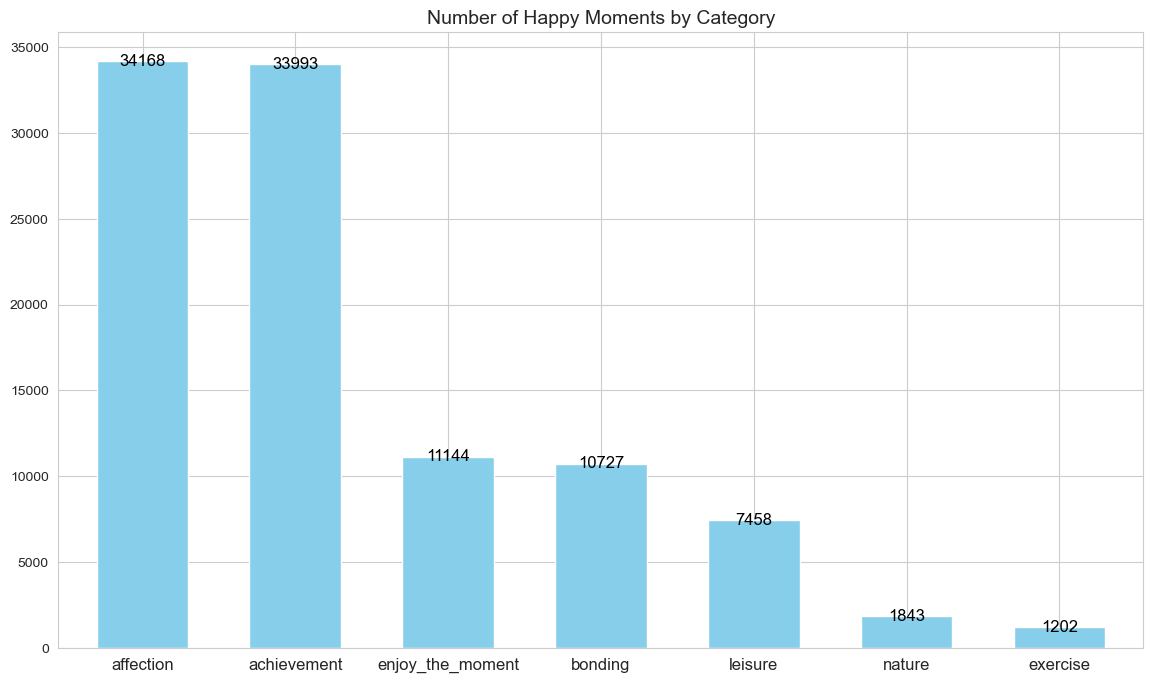

In [531]:
plt.figure(figsize=(14, 8))
ax = hm["predicted_category"].value_counts().plot(kind='bar', color='skyblue', width = 0.6)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()+10),
                ha='center', va='center', fontsize=12, color='black')
plt.title('Number of Happy Moments by Category', fontsize=14)
plt.xticks(rotation=360, fontsize=12)
plt.show()

We have 7 predicted happiness categories for happy moments (affection, achievement, enjoy_the_moment, bonding, leisure, nature, exercise). Since these categories are very general, we want to know for each category, what are the most prevalent topics using our manually created topic dictionary.

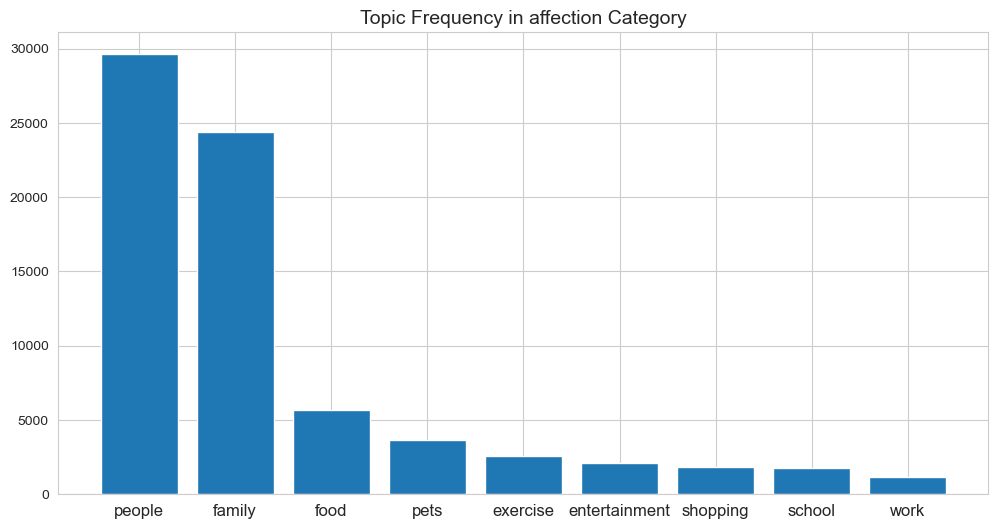

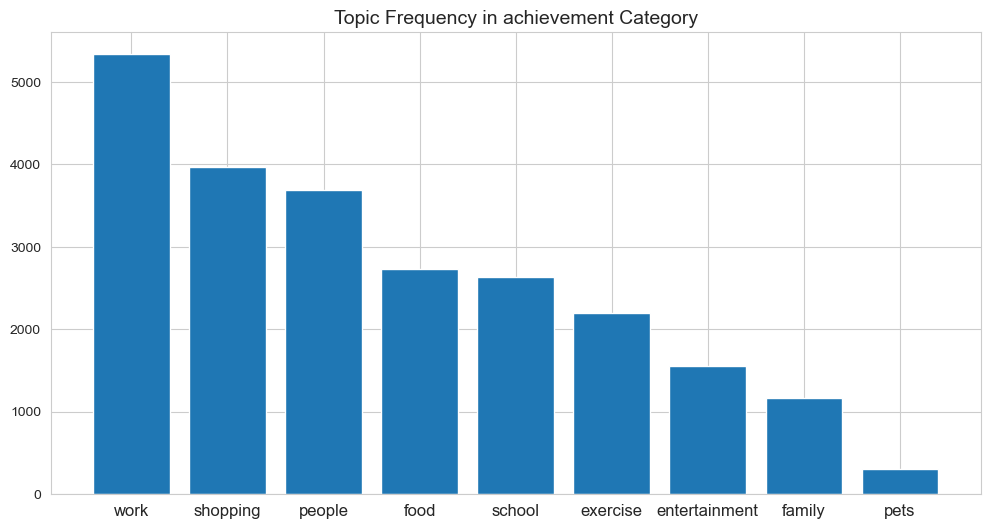

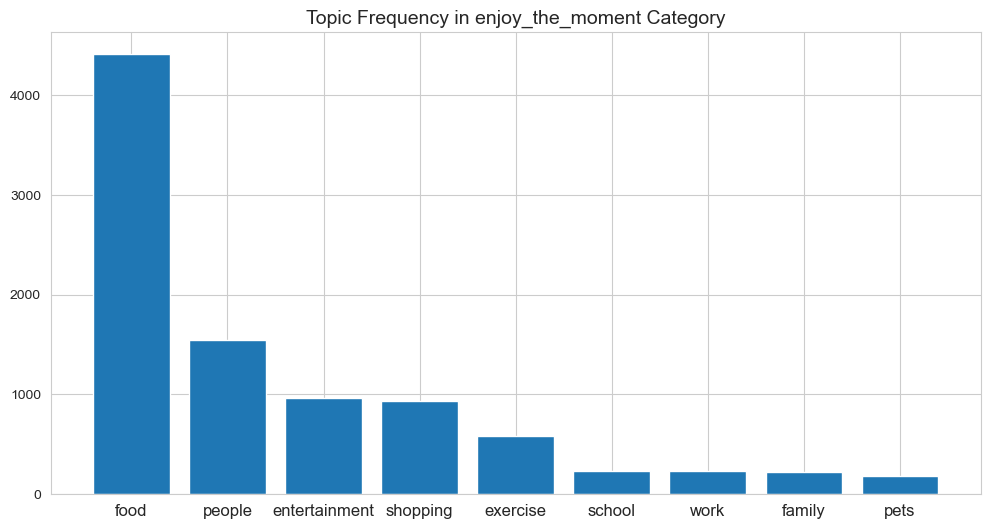

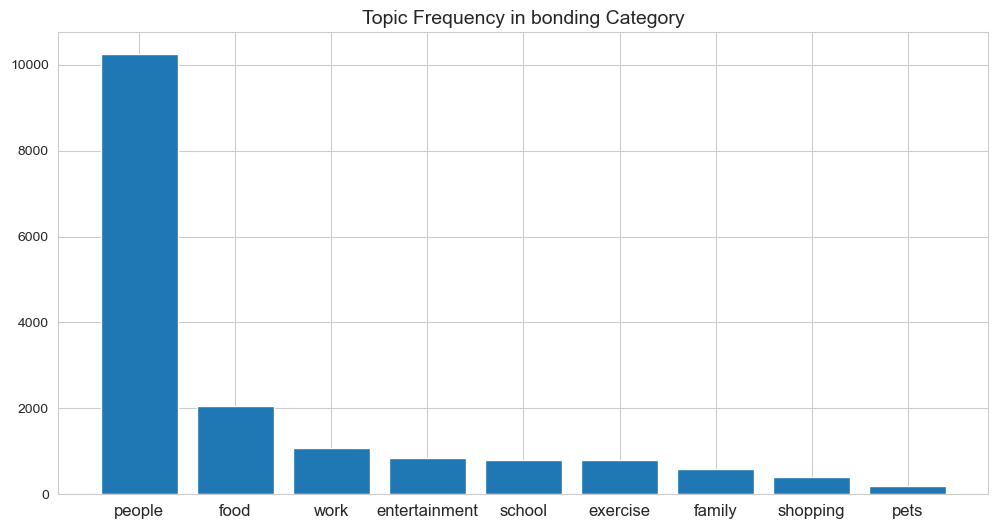

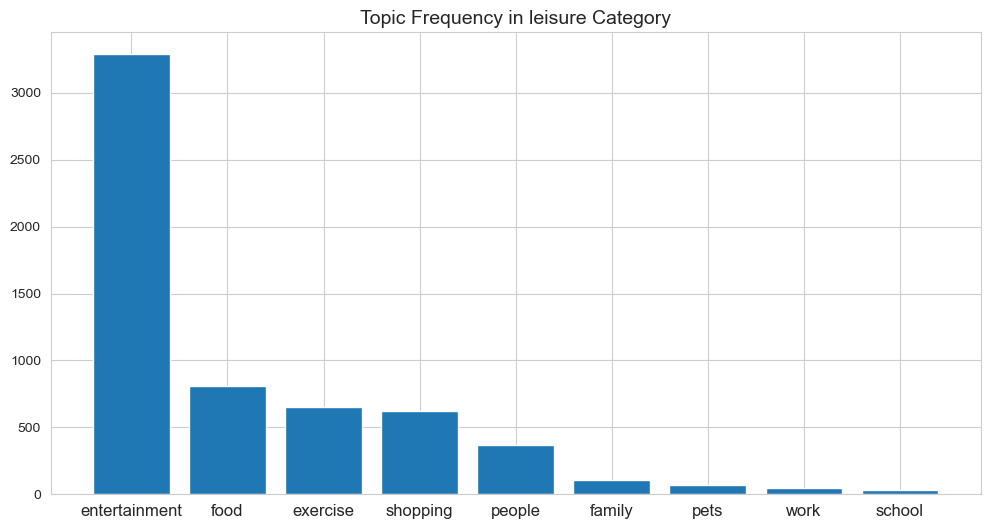

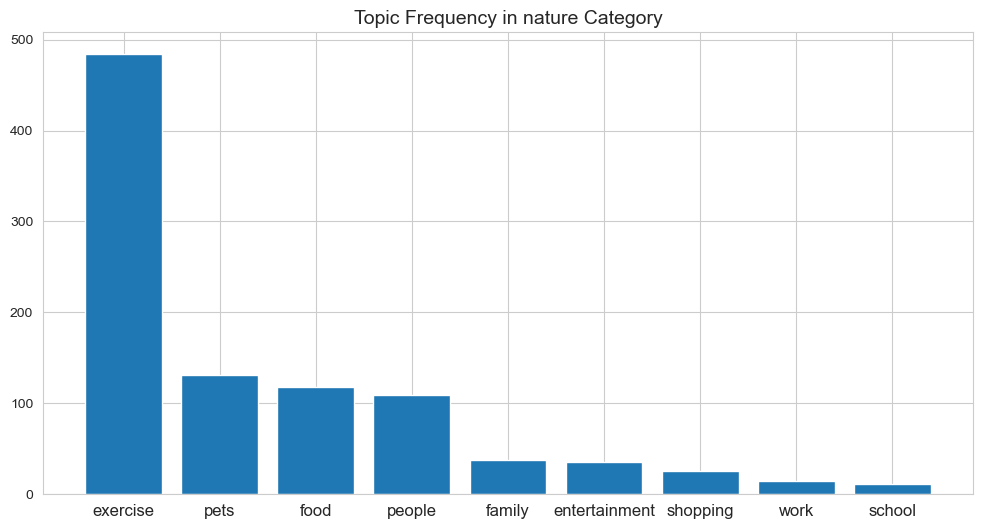

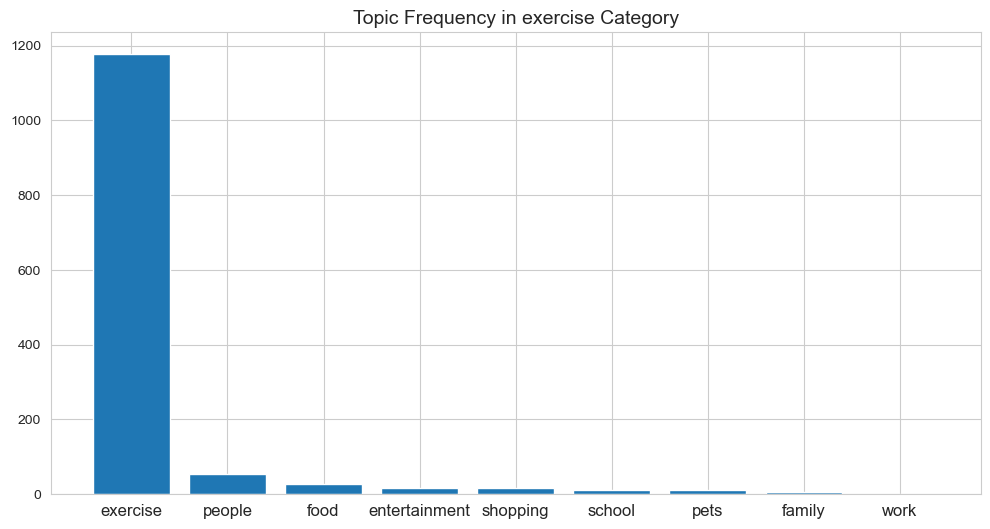

In [532]:
topic_list = ["entertainment","exercise","family","food","people","school","work","shopping","pets"]
happiness_category = ["affection", "achievement", "enjoy_the_moment", "bonding", "leisure", "nature", "exercise"]
def topic_counts(df):
    topic_counts_list = dict()
    for topic in topic_list:
        topic_counts_list[topic] = (df[topic]!=0).sum()
    topic_counts = dict(sorted(topic_counts_list.items(), key=lambda x: x[1], reverse=True))
    return topic_counts
for category in happiness_category:
    df = hm[hm["predicted_category"]==category]
    plt.figure(figsize=(12, 6))
    plt.bar(list(topic_counts(df).keys()),list(topic_counts(df).values()) )
    plt.title(f'Topic Frequency in {category} Category', fontsize=14)
    plt.xticks(fontsize=12)

In the affection category, happy moments are mostly about people and family. In the achievement category, happy moments are mostly about work, shopping, and people. In the enjoy_the_moment category, happy moments are mostly about food. In the bonding category, happy moments are mostly about people. In the leisure category, it's mostly about entertainment. In the nature category, happy moments are mostly about exercise. While in the exercise category, it's obvious that it's mostly about exercise.

## Analysis on work-related topic

Work appears to be the most prominent and frequent topic in this happy moments database. However, it's important to clarify that when we refer to "work," we are specifically addressing work-related topics within the context of office environments. The term "work" might seem unusual in the context of happiness, as it can sometimes encompass various situations. For example, some happy moments labeled as "work" in the topic dictionary may not necessarily revolve around office work (e.g., "Last month, I received a raise in my salary and treated my family to a restaurant outing. We were very happy spending quality time together, enjoying our favorite dishes, and doing some shopping.") This is where LDA comes into play. LDA results help us ensure that the sentence's central theme is work-related. Additionally, the topic dictionary assists in refining LDA results by filtering out noise. Consequently, we combine LDA results and the topic dictionary to gain insights into why work brings happiness to people.

In [536]:
token_topic = pd.merge(lemma_demographic[["hmid","tokens","age","country","gender","marital","parenthood","topics"]], hm, on = "hmid", how="inner")
topic_list = ["entertainment","exercise","family","food","people","school","shopping","pets"]
max_topic = token_topic.loc[:, topic_list].idxmax(axis=1)
condition1 = (token_topic["work"] >= token_topic.lookup(token_topic.index, max_topic))&(token_topic["work"]!=0)&(token_topic["topics"]=="work")
condition2 = (token_topic.loc[:, topic_list] == 0).all(axis=1)&(token_topic["work"] != 0)
work_topic = token_topic[(condition1)|(condition2)]

,hmid,tokens,age,country,gender,marital,parenthood,topics,wid,reflection_period,...,predicted_category,entertainment,exercise,family,food,people,school,work,shopping,pets
3,100003,"[employee, month, work, feel, appreciate]",22,USA,m,single,y,others,10079,3m,...,achievement,0,0,0,0,0,0,1,0,0
26,100026,[work],37,USA,m,married,y,work,95,3m,...,achievement,0,0,0,0,0,0,1,0,0
67,100067,"[promotion, job]",22,USA,m,single,n,work,11329,3m,...,achievement,0,0,0,0,0,0,2,0,0
92,100092,"[bonus, payday, reward, work, feel, appreciate]",26,SRB,m,single,n,work,41,3m,...,achievement,0,0,0,0,0,0,1,0,0
93,100093,"[new_car, promotion, encourage, selfi, giftit,...",29.0,IND,f,married,y,work,1367,3m,...,achievement,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92468,99784,"[bos, work, today]",34,USA,f,single,n,work,590,3m,...,achievement,0,0,0,0,0,0,1,0,0
92533,99861,"[promotion, job, surprise]",26.0,USA,m,single,n,work,5084,3m,...,achievement,0,0,0,0,0,0,2,0,0
92590,99924,"[bos, bonus, year]",51,USA,m,divorced,y,work,6524,3m,...,achievement,0,0,0,0,0,0,1,0,0
92596,99931,"[job, train]",36,IND,m,married,y,work,377,3m,...,achievement,0,0,0,0,0,0,2,0,0


### What brings people happy at work?

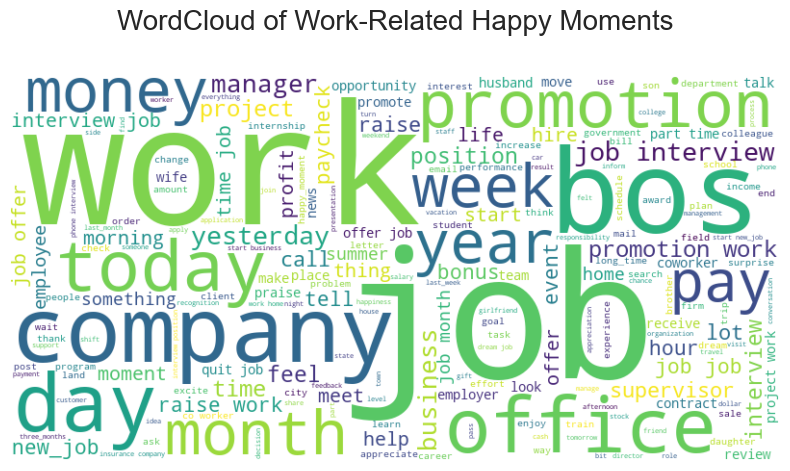

In [556]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
work_tokens = []
for token_list in work_topic["tokens"]:
    work_tokens += token_list
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(work_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Work-Related Happy Moments', fontsize = 20, y = 1.1)
plt.show()

Factors contributing to workplace happiness include co-workers, company, boss, office, promotions, and money. Creating a comfortable and supportive workspace is crucial, as it often has a more significant impact on people's happiness than financial compensation. And it's a well-known fact that happy employees tend to be more productive.

### Which countries prioritize work as their source of happy moments?

Text(0, 0.5, 'Number of Happy Moments')

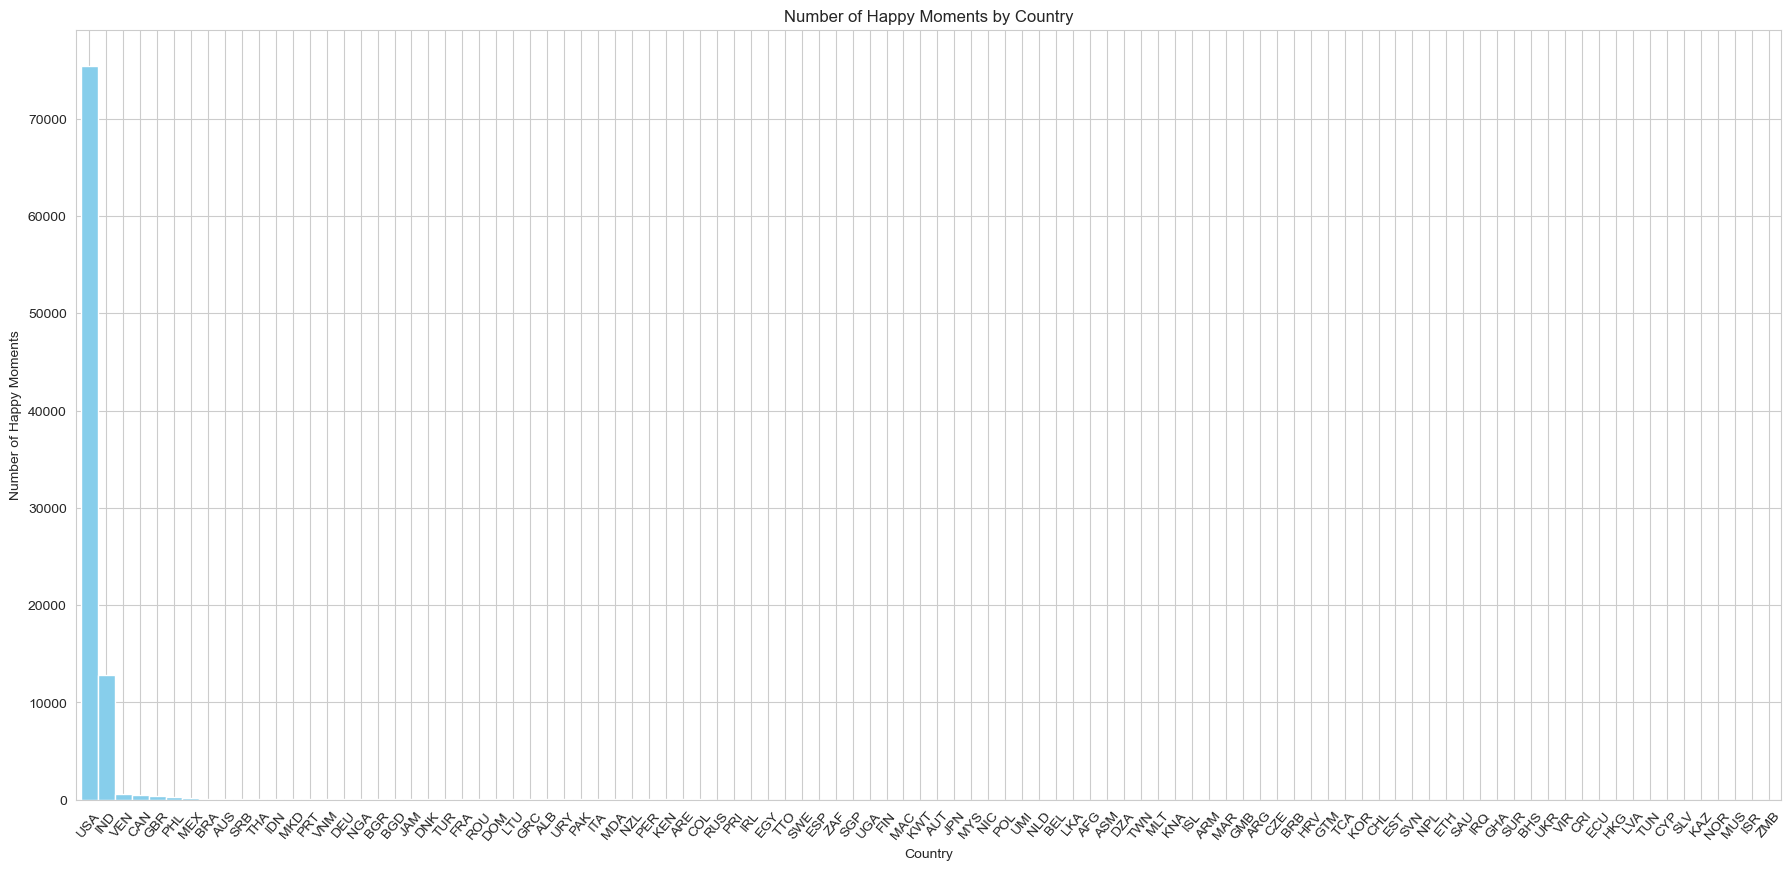

In [613]:
#Number of Happy moments by Country
plt.figure(figsize=(22, 10))
lemma_demographic["country"].value_counts().plot(kind='bar', color='skyblue', width = 1)
plt.title('Number of Happy Moments by Country')
plt.xticks(rotation=50)
plt.xlabel('Country')
plt.ylabel('Number of Happy Moments')
plt.show()

From the graph, it's evident that the USA and India have significantly more happy moments compared to all other countries, making them the primary contributors to the collected dataset. Due to the limited number of happy moments available from individuals in other countries, our analysis will primarily focus on understanding patterns within the USA and India.

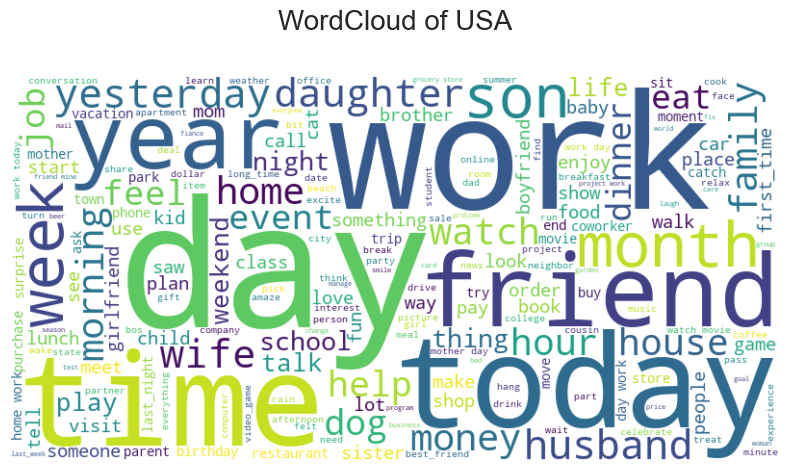

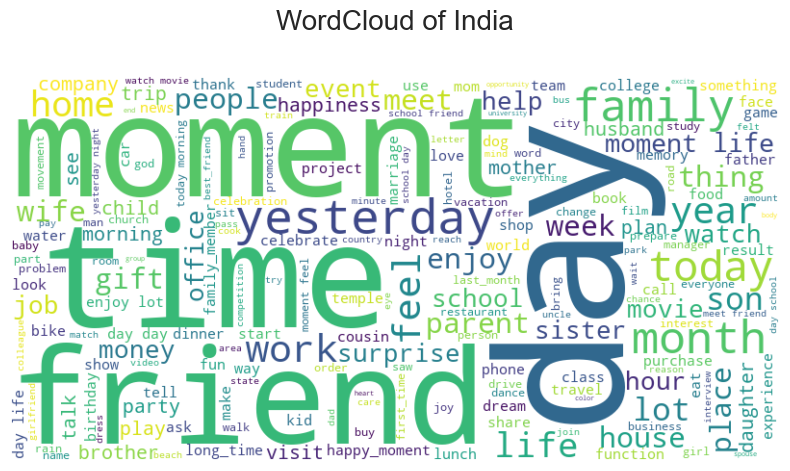

In [614]:
#Visulize WordCloud of USA and India
from wordcloud import WordCloud
import matplotlib.pyplot as plt
lemma_USA = lemma_demographic[lemma_demographic["country"]=="USA"]
USA_tokens = []
for token_list in lemma_USA["tokens"]:
    USA_tokens += token_list
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(USA_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of USA', fontsize = 20, y = 1.1)
plt.show()
lemma_India = lemma_demographic[lemma_demographic["country"]=="IND"]
India_tokens = []
for token_list in lemma_India["tokens"]:
    India_tokens += token_list
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(India_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of India', fontsize = 20, y = 1.1)
plt.show()

Apart from non-informative words, it's apparent that workers from the USA tend to discuss their work more frequently, whereas workers from India place a greater emphasis on their friends in their happy moments.

### Family or work? (Analysis on married people with kids)

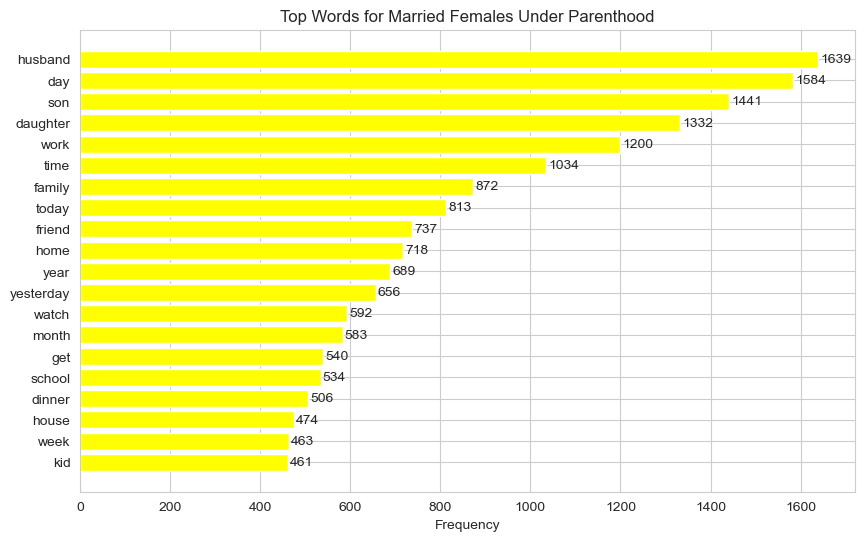

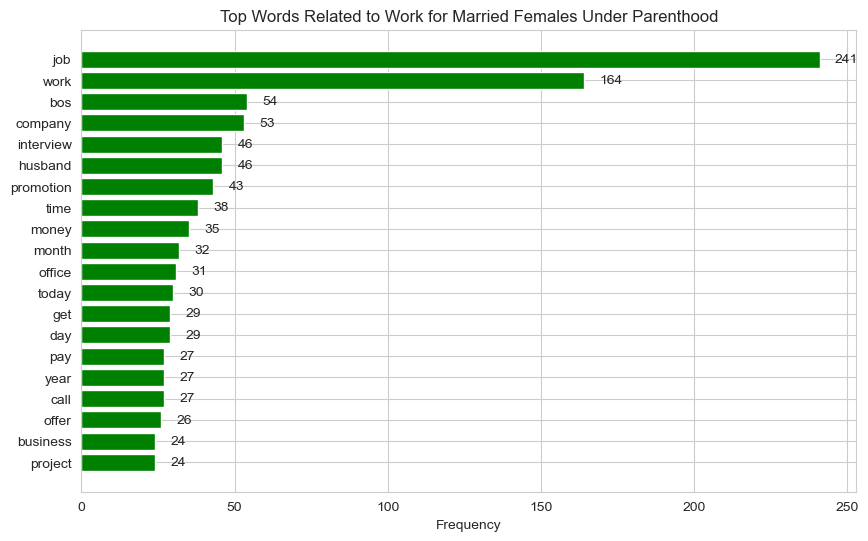

In [606]:
from collections import Counter
married_female_tokens = lemma_demographic[(lemma_demographic["gender"]=="f")&(lemma_demographic["marital"]=="married")&(lemma_demographic["parenthood"]=="y")]["tokens"]
all_term_frequencies = Counter()
for tokens in married_female_tokens:
    all_term_frequencies += Counter(tokens)
top_words = all_term_frequencies.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(words)), frequencies, tick_label=words, color = "yellow")
plt.xlabel("Frequency")
plt.title("Top Words for Married Females Under Parenthood")
plt.gca().invert_yaxis()
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(freq), va="center")
plt.show()

married_female_work = work_topic[(work_topic["gender"]=="f")&(work_topic["marital"]=="married")&(work_topic["parenthood"]=="y")]["tokens"]
all_term_frequencies = Counter()
for tokens in married_female_work:
    all_term_frequencies += Counter(tokens)
top_words = all_term_frequencies.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(words)), frequencies, tick_label=words, color = "green")
plt.xlabel("Frequency")
plt.title("Top Words Related to Work for Married Females Under Parenthood")
plt.gca().invert_yaxis()
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(freq), va="center")
plt.show()

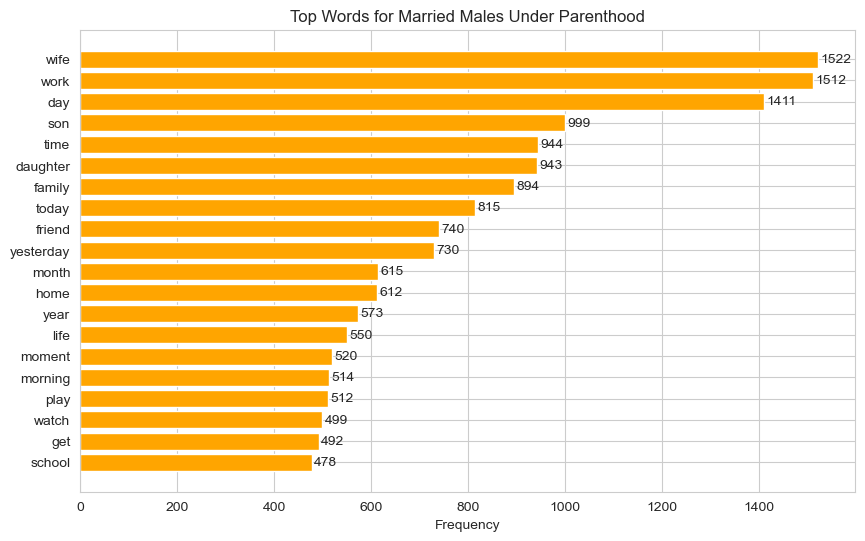

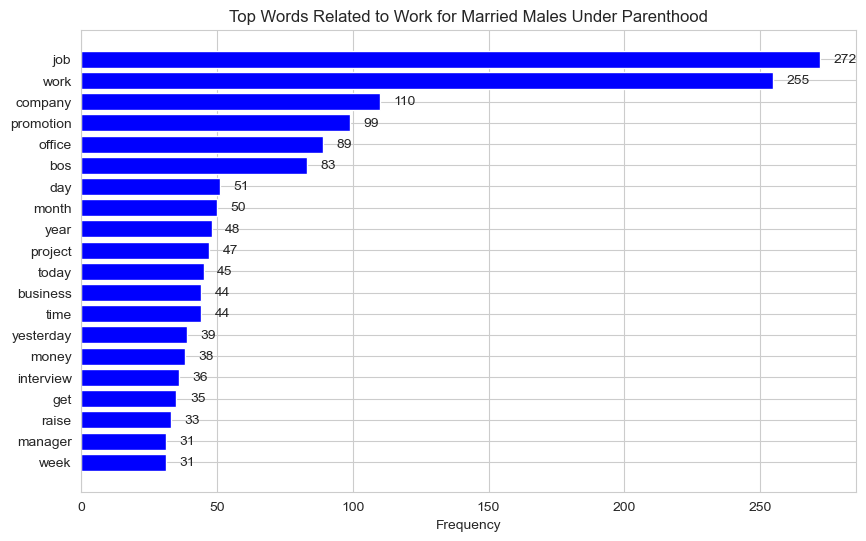

In [609]:
married_male_tokens = lemma_demographic[(lemma_demographic["gender"]=="m")&(lemma_demographic["marital"]=="married")&(lemma_demographic["parenthood"]=="y")]["tokens"]
all_term_frequencies = Counter()
for tokens in married_male_tokens:
    all_term_frequencies += Counter(tokens)
top_words = all_term_frequencies.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(words)), frequencies, tick_label=words, color = "orange")
plt.xlabel("Frequency")
plt.title("Top Words for Married Males Under Parenthood")
plt.gca().invert_yaxis()
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(freq), va="center")
plt.show()

married_male_work = work_topic[(work_topic["gender"]=="m")&(work_topic["marital"]=="married")&(work_topic["parenthood"]=="y")]["tokens"]
all_term_frequencies = Counter()
for tokens in married_male_work:
    all_term_frequencies += Counter(tokens)
top_words = all_term_frequencies.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(words)), frequencies, tick_label=words, color = "blue")
plt.xlabel("Frequency")
plt.title("Top Words Related to Work for Married Males Under Parenthood")
plt.gca().invert_yaxis()
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(freq), va="center")
plt.show()

It's evident that married women with children often express their happiness by mentioning their kids and husbands more frequently than their work in their happy moments. Conversely, married men with children tend to discuss their wives and work more than their kids. Furthermore, when it comes to topics related to work, one of the most common themes in married women's happy moments is their husbands. However, husbands do mention their wives' work-related moments, but less frequently.

### Family or Work? (Analysis on divorced people with kids)

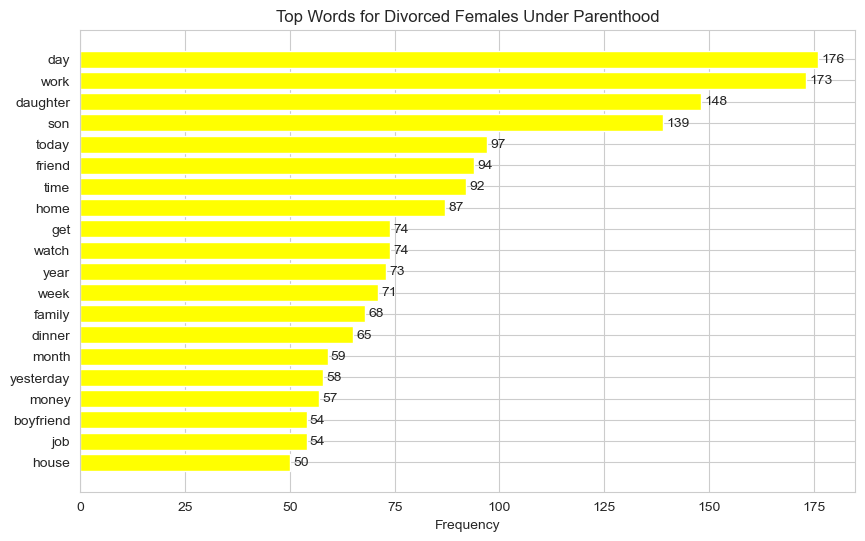

In [611]:
divorced_female_tokens = lemma_demographic[(lemma_demographic["gender"]=="f")&(lemma_demographic["marital"]=="divorced")&(lemma_demographic["parenthood"]=="y")]["tokens"]
all_term_frequencies = Counter()
for tokens in divorced_female_tokens:
    all_term_frequencies += Counter(tokens)
top_words = all_term_frequencies.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(words)), frequencies, tick_label=words, color = "yellow")
plt.xlabel("Frequency")
plt.title("Top Words for Divorced Females Under Parenthood")
plt.gca().invert_yaxis()
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width() + 0.8, bar.get_y() + bar.get_height() / 2, str(freq), va="center")
plt.show()

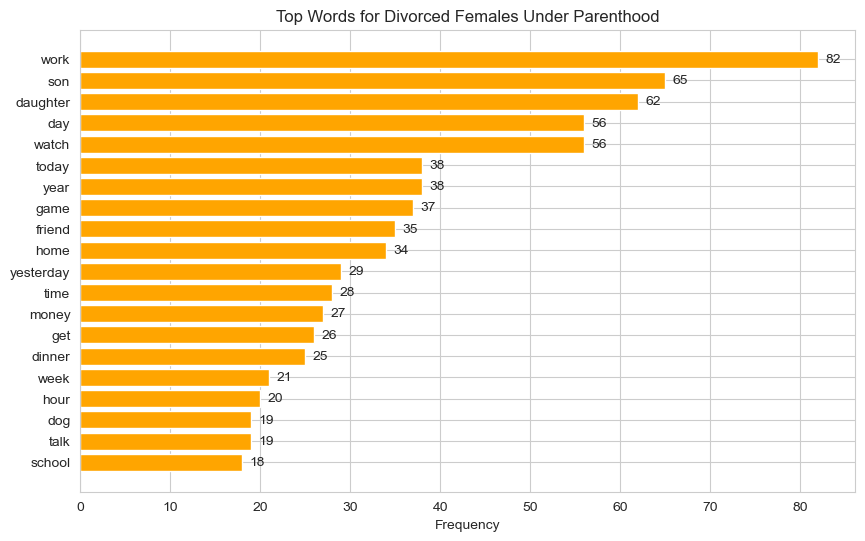

In [612]:
divorced_male_tokens = lemma_demographic[(lemma_demographic["gender"]=="m")&(lemma_demographic["marital"]=="divorced")&(lemma_demographic["parenthood"]=="y")]["tokens"]
all_term_frequencies = Counter()
for tokens in divorced_male_tokens:
    all_term_frequencies += Counter(tokens)
top_words = all_term_frequencies.most_common(20)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(words)), frequencies, tick_label=words, color = "orange")
plt.xlabel("Frequency")
plt.title("Top Words for Divorced Females Under Parenthood")
plt.gca().invert_yaxis()
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_width() + 0.8, bar.get_y() + bar.get_height() / 2, str(freq), va="center")
plt.show()

It's interesting to see that both divorced men and women often prioritize work as their primary source of happiness.